<a href="https://colab.research.google.com/github/obengdouglas/DSI-2022/blob/main/DSI_hexagon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-DSI Assignment - 2022**

**Question 1: Unexpected Plots **

**Notes**

Write a python function that will plot the points that come from the following procedure: 

1. Create a regular hexagon
2. Pick a random point, P, inside the hexagon. 
3. Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.
4. Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 
5. Make a scatter plot of all your 10,000 random points. What emerges? 

The goal of this exercise is to ensure that you have enough basic skills and familiarity with python to succeed.

[url to document](https://docs.google.com/document/d/1ZUltBJgPx2d3Y3QC44xoibZJFCpNo2mIR9KZkpnLdv8/edit)

In [ ]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

import seaborn as sns
import sklearn
import scipy
import torch
import turtle
import math
from math import sqrt
from turtle import *

#!pip3 install ColabTurtle
#from ColabTurtle.Turtle import *

#from mobilechelonian import Turtle

In [ ]:
#initializeTurtle()

# t = Turtle()

# for i in range(6):
#     t.forward(100)
#     t.left(300)
#side_length = 100
#angle = 288
#num_sides = 0

#for i in range(6):
 # forward(side_length)
  #right(angle)
  

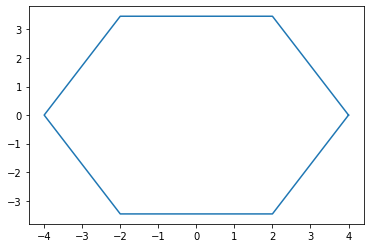

In [ ]:
import matplotlib.pyplot as plt

hexagon = [[4,0], [2,2*sqrt(3)], [-2,2*sqrt(3)], [-4,0], [-2,-2*sqrt(3)], [2,-2*sqrt(3)]]
hexagon.append(hexagon[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*hexagon) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()




In [ ]:
foo = ['a', 'b', 'c', 'd', 'e']
print(random.choice(foo))

# import random
# from shapely.geometry import Polygon, Point

# def get_random(hexagon):
#      minx, miny, maxx, maxy = hexagon.bounds
#      while True:
#          p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
#          if hexagon.contains(p):
#              return p

# p = Polygon([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)])
# point_in_poly = get_random(hexagon)

a


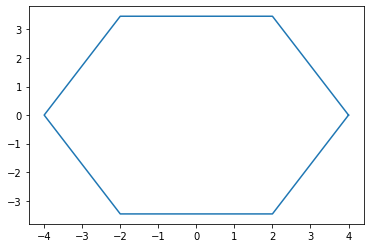

In [ ]:
points1 = {'A':(4,0), 'B':(2,2*sqrt(3)), 'C':(-2,2*sqrt(3)), 'D':(-4,0), 'E':(-2,-2*sqrt(3)), 'F':(2,-2*sqrt(3)), 'G':(1, -1)}
points2 = [[4,0], [2,2*sqrt(3)], [-2,2*sqrt(3)], [-4,0], [-2,-2*sqrt(3)], [2,-2*sqrt(3)], [1, -1]]

hexpoints = ['A', 'B', 'C', 'D', 'E', 'F']
hexagon=[points1[x] for x in hexpoints]
hexagon
hexagon.append(hexagon[0])
#points1.append(points1['A':'F']) #repeat the first point to create a 'closed loop'

xs, ys = zip(*hexagon) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()

In [ ]:
hexpoints = ['A', 'B', 'C', 'D', 'E', 'F']
hexagon=[points1[x] for x in hexpoints]
hexagon
hexagon.append(hexagon[0])
#points1.append(points1['A':'F']) #repeat the first point to create a 'closed loop'

xs, ys = zip(*hexagon) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()